# **1. 결정트리**



*   (1)~(5) sklearn 패키지의 wine 데이터셋 이용



(1) 데이터 로딩후  graphviz 패키지를 활용하여 결정 트리 모델 시각화
- 테스트 사이즈는 0.2
- 결과를 tree.dot 파일로 저장
- DecisionTreeClassifier(random_state=156)
- train_test_split(random_state=11)

In [1]:
#필요한 라이브러리 임포트 - 실행해주세요!
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
## 1-a. 데이터로드
wine_data = load_wine()
## 1-b. 데이터 분할
X_train,X_test,y_train,y_test=train_test_split(wine_data.data,wine_data.target,test_size=0.2,random_state=11)

In [4]:
## 1-c. 모델 학습
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

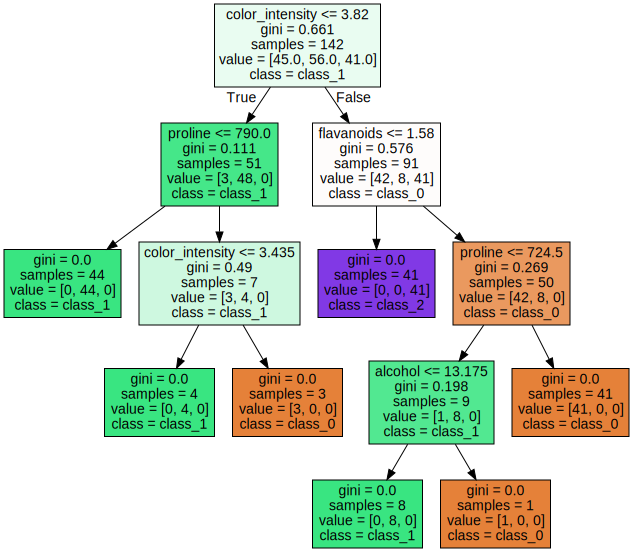

In [8]:
## 1-d. 시각화 - graphviz패키지
export_graphviz(dt_clf,
                out_file='tree.dot',
                class_names=wine_data.target_names,
                feature_names=wine_data.feature_names,
                impurity=True,
                filled= True
                )
with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

(2) 위의 결정 트리 모델에서 피처의 중요도 표현하고, 이를 seaborn 그래프를 활용하여 시각화하기


*   피처 중요도는 소수점 3의 자리까지 표현


출력 예시)
```  
Feature importances:  
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
alcohol : 0.019  
malic_acid : 0.000  
ash : 0.000  
alcalinity_of_ash : 0.000
...
```

In [10]:
# 2-1.feature importances - 예시 답안대로 print
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_), 3))

for name, value in zip(wine_data.feature_names, dt_clf.feature_importances_):
  print("{0} : {1:.3f}".format(name, value))

Feature importances:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
alcohol : 0.019
malic_acid : 0.000
ash : 0.000
alcalinity_of_ash : 0.000
magnesium : 0.000
total_phenols : 0.000
flavanoids : 0.416
nonflavanoid_phenols : 0.000
proanthocyanins : 0.000
color_intensity : 0.417
hue : 0.000
od280/od315_of_diluted_wines : 0.000
proline : 0.148


<Axes: >

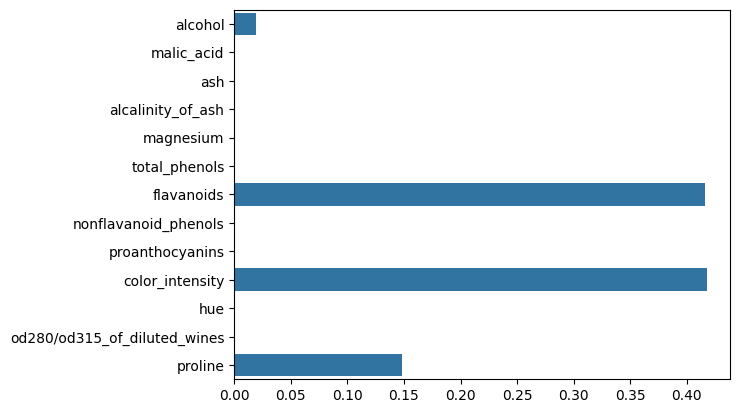

In [11]:
# 2-2.seaborn을 이용해 시각화
sns.barplot(x=dt_clf.feature_importances_,y=wine_data.feature_names)

(3) 최적의 하이퍼 파라미터와 최고 평균 정확도 수치 출력하기

* params = {
    'max_depth' : [2, 3, 4, 5],
    'min_samples_split' : [4, 8]
    }  
* 최고 평균 정확도 수치는 소수점 4자리까지 표현

* 교차 검증은 5회  




In [21]:
# 3-1. parmas 정의
params={'max_depth':[2, 3, 4, 5],'min_samples_split':[4, 8]}
# 3-2. GridSearchCV 객체 생성
grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,refit=True)
# 3-3. 모델 학습
grid_cv.fit(X_train,y_train)
# 3-4. 최고 평균 정확도 출력
print(round(grid_cv.best_score_,4))
print(grid_cv.best_params_)

0.9293
{'max_depth': 3, 'min_samples_split': 4}


(4) for 반복문을 사용하여 depth 값에 따른 정확도 수치 출력하기  
* depths = [2, 3, 4, 5]
* 정확도 수치는 소수점 4자리까지
* random_state=16

In [19]:
depths = [2, 3, 4, 5]

# 각 max_depth 값에 대해 반복
for d in depths:
    # 결정트리 분류기 생성
    dt_clf=DecisionTreeClassifier(max_depth=d,random_state=16)

    # 모델 학습
    dt_clf.fit(X_train,y_train)

    # 테스트 데이터로 예측
    preds=dt_clf.predict(X_test)

    # 정확도 계산
    accuracy=accuracy_score(y_test,preds)

    print("max_depth= {0}, 정확도={1:.4f}".format(d, accuracy))


max_depth= 2, 정확도=0.8889
max_depth= 3, 정확도=0.9722
max_depth= 4, 정확도=0.9722
max_depth= 5, 정확도=0.9722


(5) 최적화된 모델로 테스트 데이터 예측 수행(결정 트리 예측 정확도를 구할 것)


*   (3)번 내용 활용
* 정확도는 소수점 4자리까지 표현



In [20]:
# GridSearchCV에서 찾은 최적의 하이퍼파라미터로 학습된 최적 모델 추출
best_df_clf = grid_cv.best_estimator_

# 최적 모델로 테스트 데이터 예측
pred1 = best_df_clf.predict(X_test)

# 예측값과 실제값을 비교하여 정확도 계산
accuracy = accuracy_score(y_test,pred1)

print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.9722


(6) 중복된 피처명 바꾸기

* 중복된 피처명 _1 _2로 변경   
ex) ["A", "A", "A"] -> ["A", "A_1", "A_2"]
* 출력예시
```
  column_name new_name
0       feat1    feat1
1       feat2    feat2
2       feat1  feat1_1
3       feat3    feat3
4       feat2  feat2_1
5       feat4    feat4
```

In [27]:
# 실행해주세요!

df = pd.DataFrame({
    "column_name": ["feat1", "feat2", "feat1",
                    "feat3", "feat2", "feat4"]
})


In [29]:
# cumcount()를 활용해 각 column_name 별로 중복 횟수 카운트하여 새로 생성한 'cumcnt' 칼럼에 저장 (0부터 시작)
df["cumcnt"] = df.groupby('column_name').cumcount()
# 중복된 경우만 뒤에 _숫자를 붙여서 새로운 이름 생성
df["new_name"] = df.apply(
    lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0],
    axis= 1
)
# 확인
print(df[["column_name", "new_name"]])

  column_name new_name
0       feat1    feat1
1       feat2    feat2
2       feat1  feat1_1
3       feat3    feat3
4       feat2  feat2_1
5       feat4    feat4


/tmp/ipython-input-1820875540.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0],


# **2. 앙상블**

1. 사이킷런의 load_digits 데이터를 사용하여 훈련 세트(80%)와 테스트 세트(20%)로 나누시오.


In [32]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# 문제 1: 데이터 로드 및 분할
digit_data=load_digits()
X_train,X_test,y_train,y_test=train_test_split(digit_data.data,digit_data.target,test_size=0.2,random_state=11)

2. LogisticRegression과 KNeighborsClassifier를 기반으로 **보팅 분류기(VotingClassifier, soft voting)**를 만들어 훈련 후 테스트 세트 정확도를 출력하시오.


In [33]:
# 문제 2: 보팅 분류기
lr_clf=LogisticRegression(solver='liblinear')
knn_clf=KNeighborsClassifier()

#보팅 분류기
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')
vo_clf.fit(X_train,y_train)
pred=vo_clf.predict(X_test)
print(round(accuracy_score(y_test,pred),3))

0.978


3. DecisionTreeClassifier를 기반으로 BaggingClassifier를 만들어 훈련 후 테스트 세트 정확도를 출력하시오.


트리 개수(n_estimators)=100, bootstrap=True


In [41]:
# 문제 3: 배깅

bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,bootstrap=True)
bag_clf.fit(X_train,y_train)
pred=bag_clf.predict(X_test)
print(round(accuracy_score(y_test,pred),3))

0.956


4. RandomForestClassifier를 사용하여 훈련 후 테스트 세트 정확도를 출력하시오.

트리 개수(n_estimators)=100, max_features='sqrt', random_state=42

In [35]:
# 문제 4: 랜덤포레스트

rf_clf=RandomForestClassifier(n_estimators=100,max_features='sqrt',random_state=42)
rf_clf.fit(X_train,y_train)
pred=rf_clf.predict(X_test)
print(round(accuracy_score(y_test,pred),3))

0.964


5. 위 문제 2~4의 모델 중 가장 정확도가 높은 모델을 선택하고, 왜 해당 모델이 다른 모델보다 성능이 좋은지 간단히 설명하시오.

문제 5 답안 (서술형): 보팅 분류기, 보팅 분류기는 여러 개의 분류기를 결합해 유연성과 안정성을 높힌다.

# **3.랜덤 포레스트**
**4.1)** 사이킷런의 load_breast_cancer 데이터셋을 RandomForestClassifier를 이용해 예측하시오.

In [34]:
#필요한 라이브러리 임포트 - 실행해주세요!
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [36]:
#데이터셋 설정
cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_target = cancer.target

#데이터를 학습/테스트 데이터로 분리(test_sizse = 0.2, random_state = 42)
X_train,X_test,y_train,y_test=train_test_split(cancer_data,cancer_target,test_size=0.2,random_state=42)

#Random Forest객체 생성 및 예측
cancer_rf = RandomForestClassifier(random_state = 0, max_depth = 8)
cancer_rf.fit(X_train,y_train)
pred = cancer_rf.predict(X_test)

#estimate accuracy
acc = accuracy_score(y_test,pred)
print('Random Forest accuracy: {0:.4f}'.format(acc))

Random Forest accuracy: 0.9649


**4.2)** 사이킷런의 load_breast_cancer 데이터셋을 RandomForestClassifer를 통해 모델을 학습하고, GridSearchCV를 통해 최적 파라미터를 찾아 모델을 재학습 시키시오.

** *<조건>* **
* 하이퍼 파라미터:
> * n_estimators: [100,200,300]
> * max_features:['squt', 'log2']
> * max_depth: [5,10,20]
> * min_samples_leaf: [1,2,4]
> * min_samples_split:[2,5,10]

* GridSearchCV의 파라미터 중 cv = 5, n_jobs = -1로 설정
* 실행시간이 많이 소요될 수 있음(출제자의 경우 6분 소요)










In [38]:
#Random Forest 객체 생성
cancer_rf = RandomForestClassifier(random_state = 0)

#하이퍼 파라미터 설정
params = {
    'n_estimators':[100,200,300],
    'max_features':['squt', 'log2'],
    'max_depth':[5,10,20],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5,10]
}

#GridSearchCV로 최적 파라미터 찾기
grid_cv = GridSearchCV(cancer_rf,param_grid=params,cv=5,n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_estimator_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

#GridSearchCV의 최적 파라미터로 재학습
best_param = grid_cv.best_estimator_
pred2 = best_param.predict(X_test)

acc2 = accuracy_score(y_test,pred2)
print('GridSearchCV accuracy:{0:.4f}'.format(acc2))

최적 하이퍼 파라미터:
 RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=200,
                       random_state=0)
최고 예측 정확도:0.9582
GridSearchCV accuracy:0.9649


# 4. **서포트 벡터 머신(SVM)**

**1) 가우시안 RBF 커널을 사용하여 gamma 값이 3이고, 하이퍼파라미터 C의 값이 0.001인 SVM 분류기를 만드시오.**


In [40]:
# 필요한 라이브러리 임포트
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# moons 형태의 데이터 생성
X, y = make_moons(n_samples=200, noise=0.25)

# Pipeline 생성
rbf_kernel_svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='rbf',gamma=3,C=0.001))
])

rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=3))])